# DOPP 2019W Exercise 3 - Group 32

### Contributors
- Eszter Katalin Bognar - 11931695
- Luis Kolb - 01622731
- Alexander Leitner - 01525882

### Objectives of this notebook

- Are there typical characteristics of refugee origin and destination countries?
- Are there typical characteristics of large flows of refugees?

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [29]:
#read data_merged from earlier tasks
data = pd.read_csv('merged.csv',na_values=['..'])
data.set_index(['year','source','destination'],inplace=True)
data.drop('migrants',axis=1,inplace=True)
display(data)

d_GDP  d_HDI  d_CC.ESTP  d_GE.EST  \
year source      destination                                              
2000 Afghanistan Australia      21679.24784  0.898   1.923246  1.810187   
     Albania     Australia      21679.24784  0.898   1.923246  1.810187   
     Algeria     Australia      21679.24784  0.898   1.923246  1.810187   
     Andorra     Australia      21679.24784  0.898   1.923246  1.810187   
     Angola      Australia      21679.24784  0.898   1.923246  1.810187   
...                                     ...    ...        ...       ...   
2017 Vanuatu     United States  59927.92983  0.919   1.381242  1.554298   
     Viet Nam    United States  59927.92983  0.919   1.381242  1.554298   
     Yemen       United States  59927.92983  0.919   1.381242  1.554298   
     Zambia      United States  59927.92983  0.919   1.381242  1.554298   
     Zimbabwe    United States  59927.92983  0.919   1.381242  1.554298   

                                d_PV.EST  d_RL.EST  RQ.EST_x  d_VA.EST  \
year source      destination                                             
2000 Afghanistan Australia      1.334552  1.751407  1.637249  1.471305   
     Albania     Australia      1.334552  1.751407  1.637249  1.471305   
     Algeria     Australia      1.334552  1.751407  1.637249  1.471305   
     Andorra     Australia      1.334552  1.751407  1.637249  1.471305   
     Angola      Australia      1.334552  1.751407  1.637249  1.471305   
...                                  ...       ...       ...       ...   
2017 Vanuatu     United States  0.335553  1.644761  1.628115  1.049652   
     Viet Nam    United States  0.335553  1.644761  1.628115  1.049652   
     Yemen       United States  0.335553  1.644761  1.628115  1.049652   
     Zambia      United States  0.335553  1.644761  1.628115  1.049652   
     Zimbabwe    United States  0.335553  1.644761  1.628115  1.049652   

                                       s_GDP  s_HDI  s_CC.ESTP  s_GE.EST  \
year source      destination                                               
2000 Afghanistan Australia               NaN  0.345  -1.295380 -2.231651   
     Albania     Australia       1126.683318  0.667  -0.857256 -0.755118   
     Algeria     Australia       1764.888222  0.646  -0.937911 -0.963841   
     Andorra     Australia      21936.530100  0.759   1.359712  1.446284   
     Angola      Australia        556.836318  0.394  -1.522685 -1.462310   
...                                      ...    ...        ...       ...   
2017 Vanuatu     United States   3082.356323  0.595   0.005782 -0.901097   
     Viet Nam    United States           NaN  0.690        NaN       NaN   
     Yemen       United States           NaN  0.463        NaN       NaN   
     Zambia      United States   1534.865371  0.589  -0.542213 -0.627568   
     Zimbabwe    United States   1602.403507  0.553  -1.273584 -1.188722   

                                s_PV.EST  s_RL.EST  RQ.EST_y  s_VA.EST  \
year source      destination                                             
2000 Afghanistan Australia     -2.440187 -1.778437 -2.109626 -2.031417   
     Albania     Australia     -0.537979 -1.008780 -0.254360 -0.285139   
     Algeria     Australia     -1.432010 -1.211336 -0.705386 -1.110052   
     Andorra     Australia      1.167002  1.312131  1.276005  1.535655   
     Angola      Australia     -2.035583 -1.663307 -1.799331 -1.458065   
...                                  ...       ...       ...       ...   
2017 Vanuatu     United States  0.701113  0.487920 -0.331086  0.693794   
     Viet Nam    United States       NaN       NaN       NaN       NaN   
     Yemen       United States       NaN       NaN       NaN       NaN   
     Zambia      United States  0.146180 -0.325046 -0.466104 -0.335299   
     Zimbabwe    United States -0.708677 -1.377855 -1.563330 -1.196420   

                                asylum_seekers  
year source      destination                    
2000 Afghanistan Australia              1326.0  


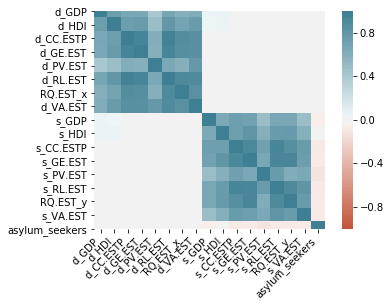

In [30]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [85]:
# https://github.com/drazenz/heatmap/blob/master/heatmap.py
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, n_colors, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=n_colors),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

### Correlation of asylum seekers with source country metrics  

As seen below, Human Development Index (HDI) and Gross Domestic Product (GDP) of an origin country don't show any correlation at all with the number of refugees fleeing from it. There are a few factors here that show at least some correlation though, namely the origin country's

- Political Stability and Absence of Violence (s_PV)
- Control of Corruption (s_CC) 
- Rule of Law (s_RL)  

as supplied by the World Governance Indicators from the World Bank. The other Indicators also have at least some influence as to the number of refugees in a given year, however the three Indicators above show the highest correlation amongst these.  

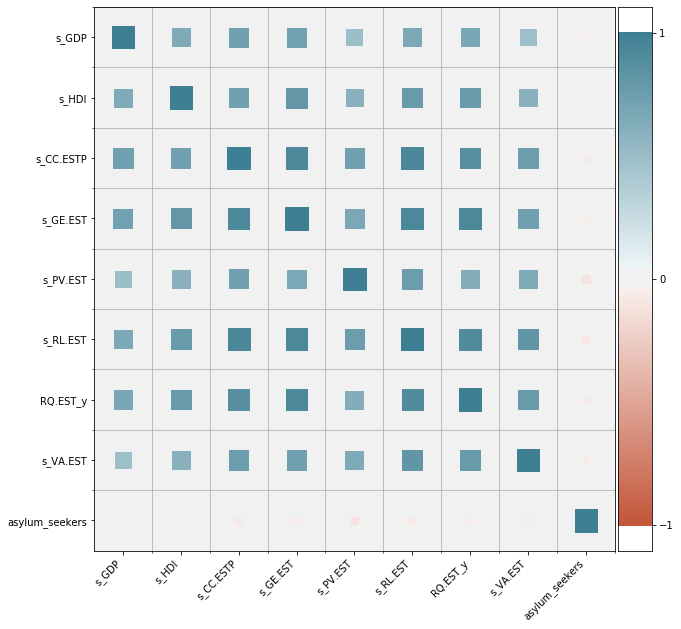

In [92]:
columns = ['s_GDP','s_HDI', 's_CC.ESTP', 's_GE.EST', 's_PV.EST', 's_RL.EST', 'RQ.EST_y', 's_VA.EST', 'asylum_seekers'] 

plt.figure(figsize=(10, 10))
corrplot(data[columns].corr(),256)

#plt.figure(figsize=(10, 10))
#corrplot(data[columns].corr(),7)

### Correlation of asylum seekers with destination country metrics  

Here, there can be no correlation observed between the Indicators of a country's performance and the number of refugees fleeing to said country. The WGI show up in the heatmap at just a hair below zero (neg. correlation) only when the "steps" of the coloring are reduced from 256 colors to just 7. In this configuration, the Indicators mentioned in the section above are colored in the color that is just one step away from a correlation of zero.  

However, the sqaures displayed are still very small even in this configuration, suggesting that there is no significant correlation after all.

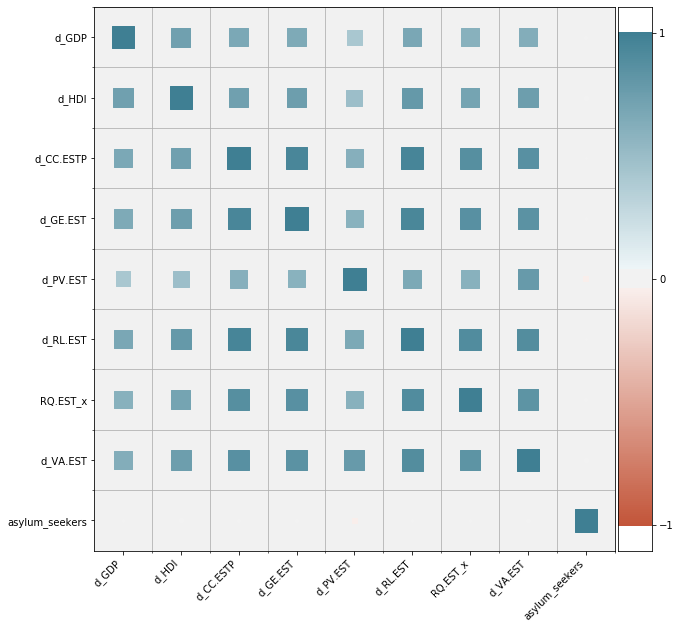

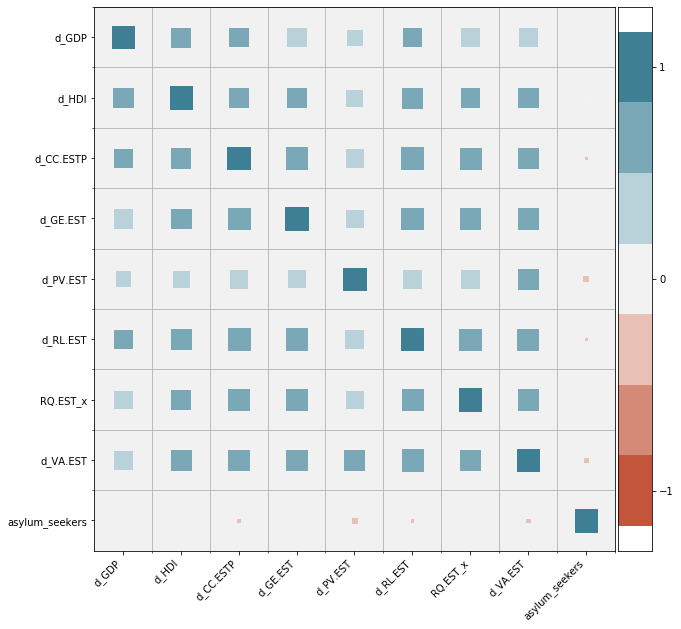

In [88]:
columns_dest = ['d_GDP', 'd_HDI', 'd_CC.ESTP','d_GE.EST', 'd_PV.EST', 'd_RL.EST', 'RQ.EST_x', 'd_VA.EST','asylum_seekers']

plt.figure(figsize=(10, 10))
corrplot(data[columns_dest].corr(),256)

plt.figure(figsize=(10, 10))
corrplot(data[columns_dest].corr(),7)

### Complete correlation heatmap

Here, we can again observe how turning down the number of possible colors can force some otherwise insignificant values to show up, that would not be visible with more possible colors.

However, at a lower "resolution" we can clearly observe how a source country's Indicators are far more significant to the number of refugees another country recieves than the Indicators of the country they are seeking asylum in.

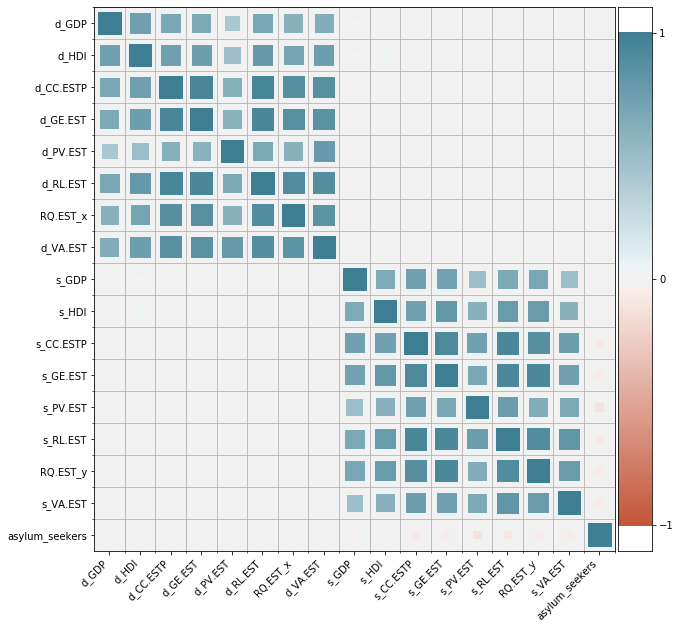

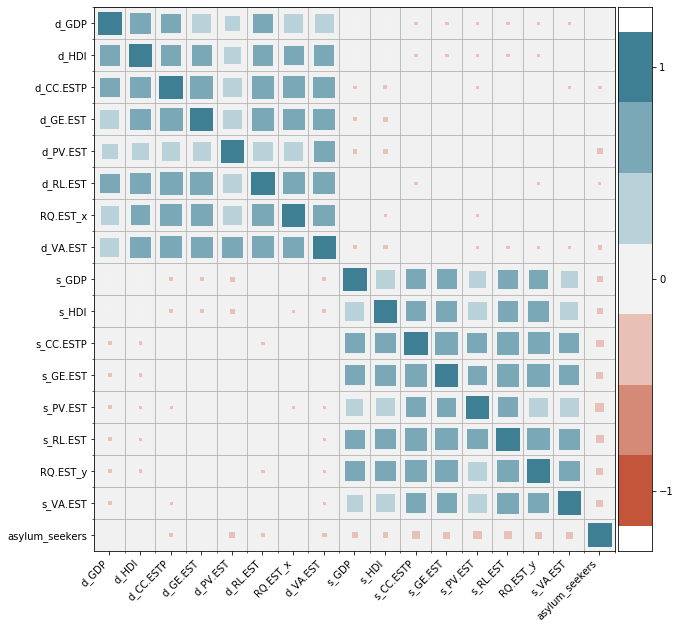

In [90]:
plt.figure(figsize=(10, 10))
corrplot(data.corr(),256)

plt.figure(figsize=(10, 10))
corrplot(data.corr(),7)

Thus, to answer the question from the beginning:

- Are there typical characteristics of refugee origin and destination countries?  

The World Governance Indicators of origin countries negatively correlate with the number of asylum seekers originating from there - when some Indicators decrease, the number of refugees originating from that country tends to increase. Important to notice, HDI and GDP have no correlation with the number of refugees fleeing a country or choosing a country to flee to.